In [1]:

import numpy as np
import matplotlib.pyplot as plt

from Agent import *
from environment import *
from controller import Controller

In [2]:
def getResponseRates(results):
    """
    Returns: (# Total events, # accepts, # dismisses, total rewards)
    """
    notificationEvents = [r for r in results if r['decision']]
    numNotifications = len(notificationEvents)
    numAcceptedNotifications = len([r for r in notificationEvents if r['reward'] > 0])
    numIgnoredNotifications = len([r for r in notificationEvents if r['reward'] < 0])
    totalRewards = sum([r['reward'] for r in notificationEvents])
    return (numNotifications, numAcceptedNotifications, numIgnoredNotifications, totalRewards)

In [3]:
def filterByWeek(results, week):
    startDay = week * 7
    endDay = startDay + 7
    return [r for r in results
            if startDay <= r['context']['numDaysPassed'] and r['context']['numDaysPassed'] < endDay]

In [4]:
def filterByDay(results, day):
    return [r for r in results if r['context']['numDaysPassed'] == day]

In [5]:
def getEnvironment():
    #return LesasStubbornUser()
    #return StubbornUser()
    return MoriningBiasedUser()

In [6]:

def getQLearningAgent():
    return QLearningAgent2()


In [7]:
def repeatEvaluationProcess(createAgentFunc, createEnvironmentFunc, repeat=10):
    simulationWeek = 20
    
    dailyAcceptingRate = np.zeros((repeat, simulationWeek * 7))
    dailyIgnoringRate = np.zeros((repeat, simulationWeek * 7))
    dailyReward = np.zeros((repeat, simulationWeek * 7))
    weeklyAcceptingRate = np.zeros((repeat, simulationWeek))
    weeklyIgnoringRate = np.zeros((repeat, simulationWeek))
    weeklyReward = np.zeros((repeat, simulationWeek))
    
    for iRound in range(repeat):
        agent = createAgentFunc()
        environment = createEnvironmentFunc()
        controller = Controller(agent, environment, simulationWeek=simulationWeek,
                                 verbose=False)
        results = controller.execute()
        for iDay in range(simulationWeek * 7):
            dailyResults = filterByDay(results, iDay)
            nTotal, nAccept, nIgnore, reward = getResponseRates(dailyResults)
            dailyAcceptingRate[iRound, iDay] = nAccept / nTotal if nTotal > 0 else 0.
            dailyIgnoringRate[iRound, iDay] = nIgnore / nTotal if nTotal > 0 else 0.
            dailyReward[iRound, iDay] = reward
        for iWeek in range(simulationWeek):
            weeklyResults = filterByWeek(results, iWeek)
            nTotal, nAccept, nIgnore, reward = getResponseRates(weeklyResults)
            weeklyAcceptingRate[iRound, iWeek] = nAccept / nTotal if nTotal > 0 else 0.
            weeklyIgnoringRate[iRound, iWeek] = nIgnore / nTotal if nTotal > 0 else 0.
            weeklyReward[iRound, iWeek] = reward
    meanDailyAcceptingRate = np.mean(dailyAcceptingRate, axis=0)
    stdDailyAcceptingRate = np.std(dailyAcceptingRate, axis=0)
    meanDailyIgnoringRate = np.mean(dailyIgnoringRate, axis=0)
    stdDailyIgnoringRate = np.std(dailyIgnoringRate, axis=0)
    meanDailyReward = np.mean(dailyReward, axis=0)
    stdDailyReward = np.std(dailyReward, axis=0)
    meanWeeklyAcceptingRate = np.mean(weeklyAcceptingRate, axis=0)
    stdWeeklyAcceptingRate = np.std(weeklyAcceptingRate, axis=0)
    meanWeeklyIgnoringRate = np.mean(weeklyIgnoringRate, axis=0)
    stdWeeklyIgnoringRate = np.std(weeklyIgnoringRate, axis=0)
    meanWeeklyReward = np.mean(weeklyReward, axis=0)
    stdWeeklyReward = np.std(weeklyReward, axis=0)
    
    plt.plot(meanDailyAcceptingRate)
    plt.ylabel('Daliy accepting rate')
    plt.show()
    
    plt.plot(meanWeeklyAcceptingRate)
    plt.ylabel('Weekly accepting rate')
    plt.show()
    
    plt.plot(stdDailyIgnoringRate)
    plt.ylabel('Daliy Ignoring rate')
    plt.show()
    
    plt.plot(meanWeeklyIgnoringRate)
    plt.ylabel('Weekly Ignoring rate')
    plt.show()
    
    plt.plot(meanDailyReward)
    plt.ylabel('daily reward')
    plt.show()
    
    plt.plot(meanWeeklyReward)
    plt.ylabel('Weekly reward')
    plt.show()

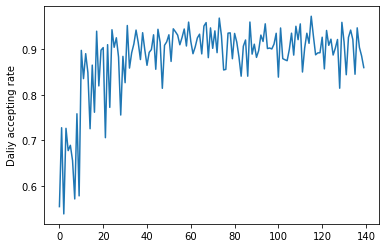

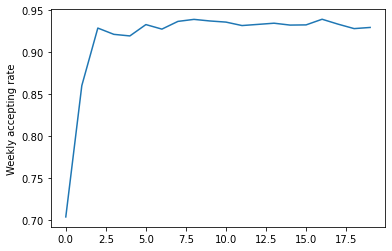

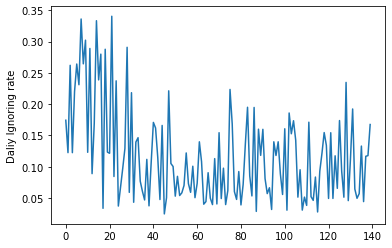

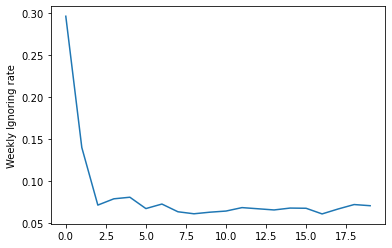

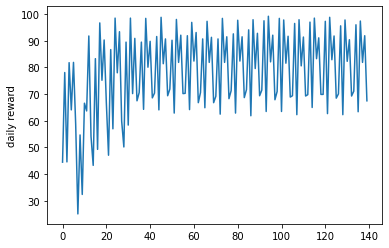

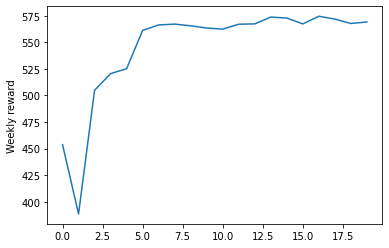

In [8]:
repeatEvaluationProcess(getQLearningAgent, getEnvironment)